# Timing outer_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `outer_real_dumb` and `outer_real_numba`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([10, 50, 100, 500, 1000, 3000])

In [3]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
for Ni in tq(N):
    vector = np.ones(Ni)
    # outer_real_dumb
    time = %timeit -o fcs.outer_real_dumb(vector, vector)
    list_time_dumb.append(time.average)
    # outer_real_numpy
    time = %timeit -o fcs.outer_real_numpy(vector, vector)
    list_time_numpy.append(time.average)
    # outer_real_numba
    time = %timeit -o fcs.outer_real_numba(vector, vector)
    list_time_numba.append(time.average)

66.1 µs ± 484 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.07 µs ± 62.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The slowest run took 10.20 times longer than the fastest. This could mean that an intermediate result is being cached.
4.44 µs ± 5.87 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
324 µs ± 969 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.21 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.75 µs ± 78 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
658 µs ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.8 µs ± 817 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14.7 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.9 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
357 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
323 µs ± 676 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.79 ms ± 212 

In [4]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)

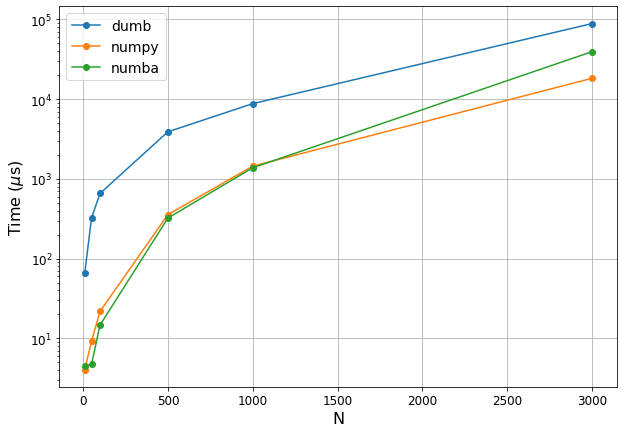

In [5]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_dumb*1e6, 'o-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'o-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'o-', label = 'numba')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()

In [3]:
x = np.ones(500)

In [4]:
%timeit np.outer(x,x)

411 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%timeit x[:, np.newaxis]*x

406 µs ± 5.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%timeit x[:, np.newaxis]*x[np.newaxis, :]

418 µs ± 5.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
